In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


629

# Perform API Calls

#Perform a weather check on each city using a series of successive API calls.

#Include a print log of each city as it'sbeing processed (with the city number and city name).

In [8]:
# Set url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Define URL Query 
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [9]:
# Initialize list to store data from retrival
city_id = []
city_list = []
country = []
date = []
lat_list = []
lng_list = []
max_temp = []
wind = []
humidity = []
cloudiness = []

In [10]:
print("Beginning Data Retrieval ")
print("-----------------------------")

city_counter = 0
set_counter = 1

#loop thorugh the cities and append results to lists
for city in cities:

    response = requests.get(query_url + city).json() 

    try:
        city_id.append(response['id'])
        city_list.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max']) 
        wind.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
            
  
        if city_counter >= 49:
            city_counter = 0
            set_counter += 1
        else:
            city_counter +=1

        print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
   
    #print except message and skip
    except (KeyError, IndexError):
        print(f"City not found. Skipping...")
  
    

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | tautira
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | kharp
Processing Record 4 of Set 1 | nerchinskiy zavod
Processing Record 5 of Set 1 | nanortalik
City not found. Skipping...
Processing Record 6 of Set 1 | hithadhoo
City not found. Skipping...
Processing Record 7 of Set 1 | meulaboh
Processing Record 8 of Set 1 | sumenep
Processing Record 9 of Set 1 | lazaro cardenas
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | rio gallegos
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | adeje
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | hobart
Processin

Processing Record 41 of Set 4 | sioux lookout
Processing Record 42 of Set 4 | havre-saint-pierre
Processing Record 43 of Set 4 | klyuchi
Processing Record 44 of Set 4 | khatanga
Processing Record 45 of Set 4 | sakakah
Processing Record 46 of Set 4 | lengshuijiang
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | tilichiki
Processing Record 49 of Set 4 | cherskiy
Processing Record 0 of Set 5 | pevek
Processing Record 1 of Set 5 | west bay
Processing Record 2 of Set 5 | aguas verdes
Processing Record 3 of Set 5 | udimskiy
Processing Record 4 of Set 5 | paralimni
Processing Record 5 of Set 5 | gagra
Processing Record 6 of Set 5 | nome
City not found. Skipping...
Processing Record 7 of Set 5 | shingu
Processing Record 8 of Set 5 | bara
Processing Record 9 of Set 5 | vardo
Processing Record 10 of Set 5 | vila velha
Processing Record 11 of Set 5 | levokumskoye
Processing Record 12 of Set 5 | upernavik
Processing Record 13 of Set 5 | tshikapa
City not found. Skipping..

Processing Record 27 of Set 8 | mandalgovi
City not found. Skipping...
Processing Record 28 of Set 8 | sinnar
Processing Record 29 of Set 8 | moree
Processing Record 30 of Set 8 | balkhash
Processing Record 31 of Set 8 | te anau
Processing Record 32 of Set 8 | kwinana
Processing Record 33 of Set 8 | kihei
City not found. Skipping...
Processing Record 34 of Set 8 | fort frances
Processing Record 35 of Set 8 | puyang
Processing Record 36 of Set 8 | crossville
Processing Record 37 of Set 8 | sal rei
Processing Record 38 of Set 8 | hammerfest
Processing Record 39 of Set 8 | methala
Processing Record 40 of Set 8 | burnie
Processing Record 41 of Set 8 | monmouth
Processing Record 42 of Set 8 | antofagasta
Processing Record 43 of Set 8 | gornopravdinsk
Processing Record 44 of Set 8 | cornwall
Processing Record 45 of Set 8 | yongan
Processing Record 46 of Set 8 | filadelfia
Processing Record 47 of Set 8 | carbonia
Processing Record 48 of Set 8 | hukuntsi
Processing Record 49 of Set 8 | moranba

Processing Record 12 of Set 12 | nouakchott
Processing Record 13 of Set 12 | maniitsoq
City not found. Skipping...
Processing Record 14 of Set 12 | tairua
Processing Record 15 of Set 12 | vikhorevka
Processing Record 16 of Set 12 | bondo
Processing Record 17 of Set 12 | achacachi
Processing Record 18 of Set 12 | doha
Processing Record 19 of Set 12 | usatove
Processing Record 20 of Set 12 | kabo
City not found. Skipping...
City not found. Skipping...
Processing Record 21 of Set 12 | nizhnevartovsk
Processing Record 22 of Set 12 | kabwe
Processing Record 23 of Set 12 | port lincoln
Processing Record 24 of Set 12 | poum
-----------------------------
Data Retrieval Complete
-----------------------------


In [11]:
len(cities)

629

In [126]:
#Convert to dataFrame
weather_df = pd.DataFrame({
    "ID" : city_id,
    "City" : city_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind,
    "Country" : country,
    "Date" : date})
weather_df.head()

,ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,4033557,Tautira,-17.7333,-149.1500,30.00,62,40,1.54,PF,1619660629
1,1006984,East London,-33.0153,27.9116,19.65,76,100,2.64,ZA,1619660559
2,1503726,Kharp,66.8014,65.8081,-4.81,92,100,3.03,RU,1619660630
3,2019323,Nerchinskiy Zavod,51.3088,119.6100,0.73,74,100,4.41,RU,1619660419
4,3421765,Nanortalik,60.1432,-45.2371,1.75,94,59,2.26,GL,1619660512


In [127]:
#Export dataframe to csv file
weather_df.to_csv("../output_data/cities.csv")

In [128]:
#display statistics for the dataframe
weather_df.describe()

,ID,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,5.740000e+02,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,2.734464e+06,18.208117,16.850384,17.091045,69.850174,54.083624,3.118537,1.619661e+09
std,1.717035e+06,33.248667,91.346176,10.238536,23.137314,39.451209,2.095664,1.314927e+02
min,5.337200e+04,-54.800000,-179.166700,-9.330000,4.000000,0.000000,0.120000,1.619660e+09
25%,1.507184e+06,-8.535000,-65.081525,10.000000,60.000000,11.250000,1.540000,1.619661e+09
50%,2.213604e+06,20.742500,22.560800,19.225000,76.000000,68.000000,2.675000,1.619661e+09
75%,3.671419e+06,46.414475,98.667700,25.150000,87.000000,92.750000,4.120000,1.619661e+09
max,8.079926e+06,78.218600,179.316700,36.140000,100.000000,100.000000,12.350000,1.619661e+09


In [129]:
#Inspect the data and remove the cities where the humidity > 100%.
#Skip this step if there are no cities that have humidity > 100%.
weather_city_df = weather_df[(weather_df["Humidity"] > 100)].index                                 
weather_city_df


Int64Index([], dtype='int64')

In [130]:
#  Get the indices of cities that have humidity over 100%.


In [131]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

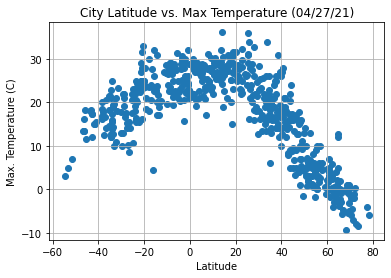

In [132]:
# Plot variables from dataframe
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

#labels
plt.title("City Latitude vs. Max Temperature (04/27/21)")
plt.ylabel("Max. Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save and show plot
plt.savefig("../output_data/latitude_vs_maxtemp.png")
plt.show()

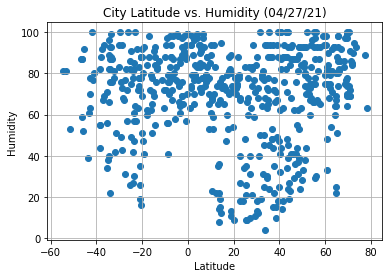

In [133]:
# Plot variables from dataframe
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

#labels
plt.title("City Latitude vs. Humidity (04/27/21)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save and show plot
plt.savefig("../output_data/latitude_vs_humidity.png")
plt.show()

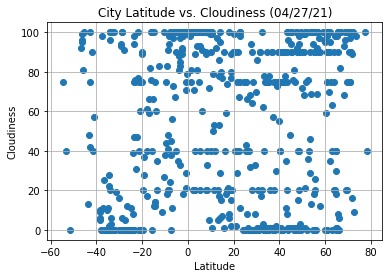

In [134]:
# Plot variables from dataframe
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

#labels
plt.title("City Latitude vs. Cloudiness (04/27/21)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save and show plot
plt.savefig("../output_data/latitude_vs_cloudiness.png")
plt.show()

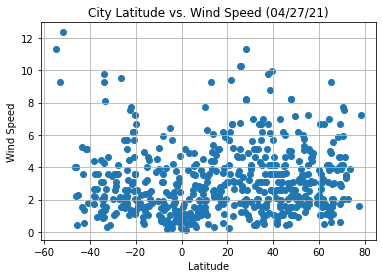

In [135]:
# Plot variables from dataframe
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

#labels
plt.title("City Latitude vs. Wind Speed (04/27/21)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save and show plot
plt.savefig("../output_data/latitude_vs_windspeed.png")
plt.show()

In [136]:
#Linear Regression
#create function for linear regression and scatter plot

def linear_regression(x, y, a, b):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq, (a, b), fontsize=15,color="red")
    plt.xlabel('Latitude')
    print(f"The r-value is: {rvalue}")
    plt.show()

In [137]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[(weather_df["Lat"] >= 0)]
southern_df = weather_df.loc[(weather_df["Lat"] < 0)]

The r-value is: -0.889733672258658


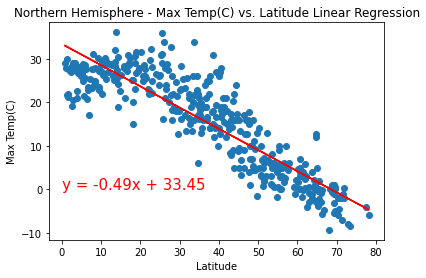

In [138]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x = northern_df["Lat"]
y = northern_df["Max Temp"]
plt.ylabel("Max Temp(C)")
plt.title("Northern Hemisphere - Max Temp(C) vs. Latitude Linear Regression")
linear_regression(x, y, 0, 0)

The r-value is: 0.67911119747636


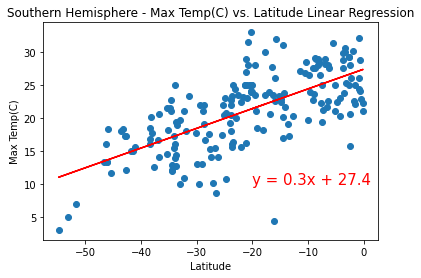

In [139]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x = southern_df["Lat"]
y = southern_df["Max Temp"]
plt.ylabel("Max Temp(C)")
plt.title("Southern Hemisphere - Max Temp(C) vs. Latitude Linear Regression")
linear_regression(x, y, -20, 10)

The r-value is: 0.11989730995074403


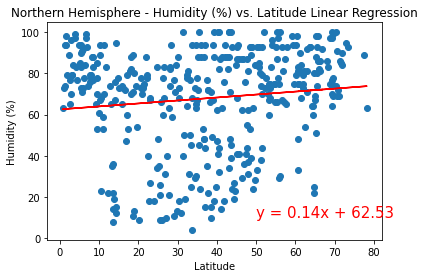

In [140]:
#Northern Hemisphere - Humidity vs. Latitude Linear Regression
x = northern_df["Lat"]
y = northern_df["Humidity"]
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
linear_regression(x, y, 50, 10)

The r-value is: 0.17849264611346424


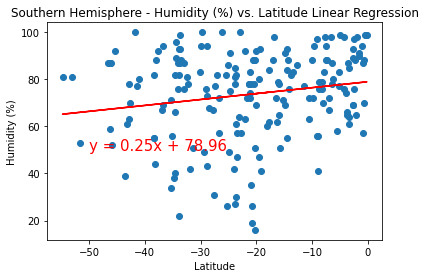

In [146]:
#Southern Hemisphere - Humidity vs. Latitude Linear Regression
x = southern_df["Lat"]
y = southern_df["Humidity"]
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
linear_regression(x, y, -50, 50)

The r-value is: 0.02479513086392681


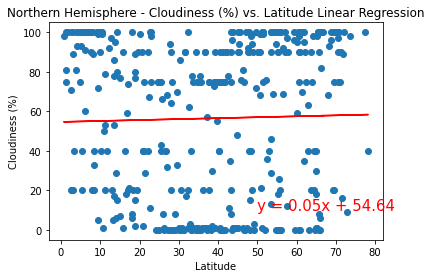

In [142]:
#Northern Hemisphere -Cloudiness vs. Latitude Linear Regression
x = northern_df["Lat"]
y = northern_df["Cloudiness"]
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
linear_regression(x, y, 50, 10)

The r-value is: 0.26276902172385674


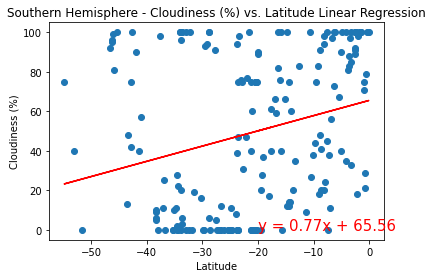

In [143]:
#Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
x = southern_df["Lat"]
y = southern_df["Cloudiness"]
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
linear_regression(x, y, -20, 0)

The r-value is: 0.09119660705268712


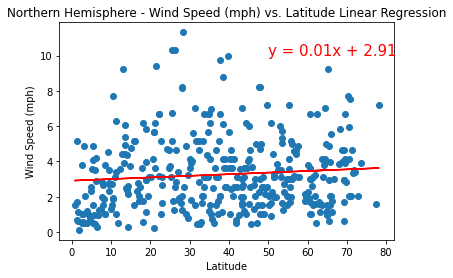

In [144]:
#Northern Hemisphere Wind Speed vs. Latitude Linear Regression
x = northern_df["Lat"]
y = northern_df["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
linear_regression(x, y, 50, 10)

The r-value is: -0.2984814531992752


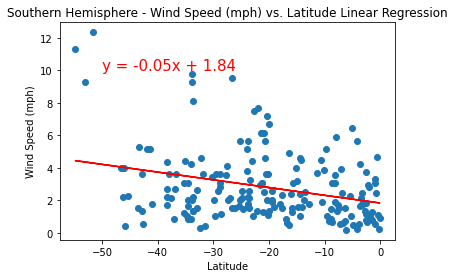

In [145]:
#Southern Hemisphere Wind Speed vs. Latitude Linear Regression
x = southern_df["Lat"]
y = southern_df["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
linear_regression(x, y, -50, 10)